In [1]:
import torch
from torch import nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'
zip_file_path = data_path / 'pizza_steak_sushi.zip'

if not image_path.is_dir():
    image_path.mkdir(parents=True, exist_ok=True)

if not zip_file_path.exists():
    with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(request.content)
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    zip_ref.extractall(image_path)

In [4]:
image_path

PosixPath('data/pizza_steak_sushi')

In [5]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [7]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [8]:
image_path

PosixPath('data/pizza_steak_sushi')

In [9]:
list(image_path.glob('*/*/*.jpg'))

[PosixPath('data/pizza_steak_sushi/train/pizza/2885050.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3530210.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2569760.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2821048.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2885796.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/138855.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/300869.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1105700.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2811032.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1968947.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/320570.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1412034.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2154394.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2992084.jpg'),
 PosixPath(

image path: data/pizza_steak_sushi/train/pizza/38349.jpg
image class: pizza
image height and width: 384, 512


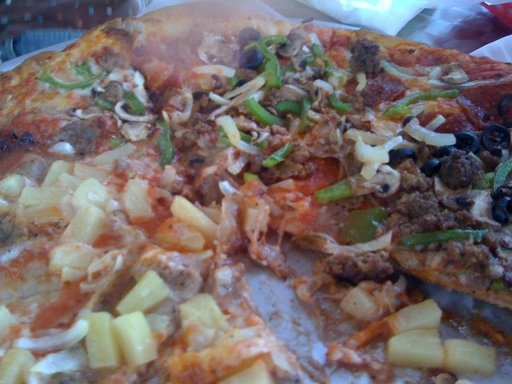

In [10]:
import random
from PIL import Image
random.seed(42)
image_path_list = list(image_path.glob('*/*/*.jpg'))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f'image path: {random_image_path}')
print(f'image class: {image_class}')
print(f'image height and width: {img.height}, {img.width}')
img

In [11]:
img.size

(512, 384)

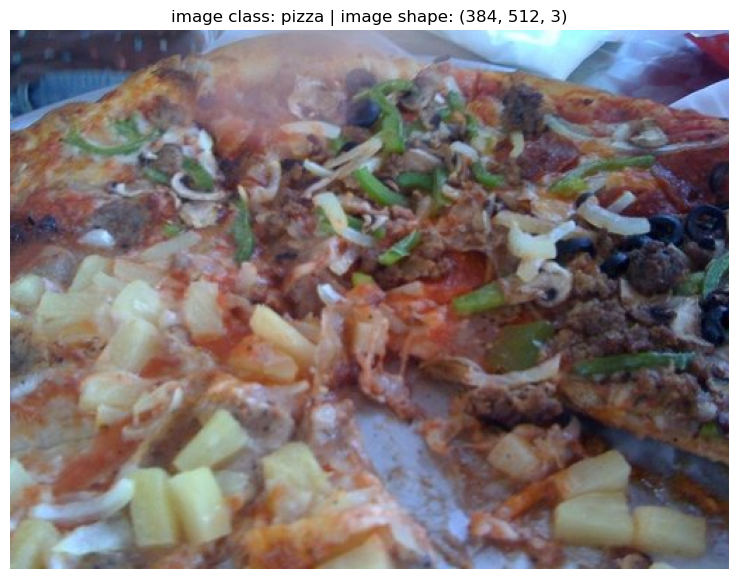

In [12]:
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f'image class: {image_class} | image shape: {image_as_array.shape}')
plt.axis(False);

In [13]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [14]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [15]:
def plot_transformed_images(image_path_list, transform, n, seed=42):
    random.seed(42)
    random_n_image_paths = random.sample(image_path_list, k=n)
    for image_path in random_n_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nsize: {f.size}')
            ax[0].axis(False)
            
            # transform image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nsize: {transformed_image.shape}')
            ax[1].axis(False)
            
            fig.suptitle(f'{image_path.parent.stem}', fontsize=16)

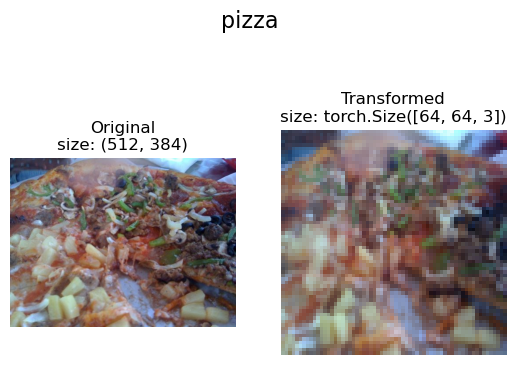

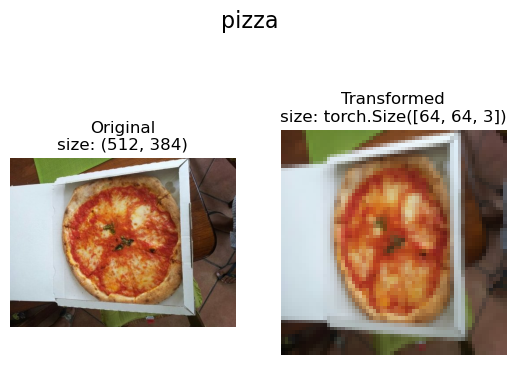

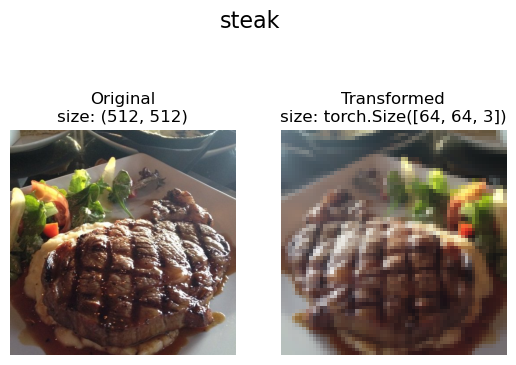

In [16]:
plot_transformed_images(image_path_list, data_transform, 3)

In [17]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)
print(f'Train data:\n{train_data}\nTest data:\n{test_data}')

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [18]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [19]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [20]:
image, label = train_data[0]
image.shape, label

(torch.Size([3, 64, 64]), 0)

matplotlib -> HWC

but pytoch -> CHW

In [21]:
image.permute(1, 2, 0).shape

torch.Size([64, 64, 3])

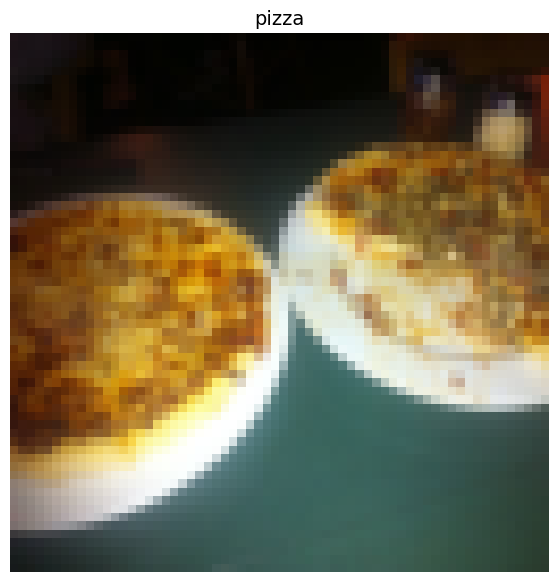

In [22]:
image_permute = image.permute(1, 2, 0)
plt.figure(figsize=(10, 7))
plt.imshow(image_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14);

In [23]:
os.cpu_count()

16

In [24]:
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                            batch_size=1,
                            num_workers=1,
                            shuffle=False)

In [25]:
image, label = next(iter(train_dataloader))
image.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [26]:
import pathlib
from torch.utils.data import Dataset
from typing import Tuple, Dict, List

In [27]:
list(os.scandir(train_dir))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [28]:
class_names_found = sorted([entry.name for entry in list(os.scandir(train_dir))])
class_names_found

['pizza', 'steak', 'sushi']

In [29]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in list(os.scandir(directory)))
    if not classes:
        raise FileNotFoundError(f'Can not find any classes in {directory}')
    class_to_index = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_index

In [30]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [31]:
class ImageFolderCustom(Dataset):
    
    
    def __init__(self, targ_dir: str, transform=None) -> None:
        self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)
    
    
    def load_image(self, index:int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [32]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [33]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fa5868f4f40>,
 <__main__.ImageFolderCustom at 0x7fa5868f4670>)

In [34]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [35]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [36]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [37]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                         n: int = 10,
                         seed: int = None):
    if seed:
        random.seed(seed)
    random_sample_indexes = random.sample(range(len(train_data)), k=n)
    plt.figure(figsize=(10, 10))
    for i, index in enumerate(random_sample_indexes):
        image, label = dataset[index]
        image = image.permute(1, 2, 0)
        plt.subplot(1, n, i+1)
        plt.imshow(image)
        plt.axis(False)
        classes = dataset.classes
        plt.title(f'{classes[label]}')

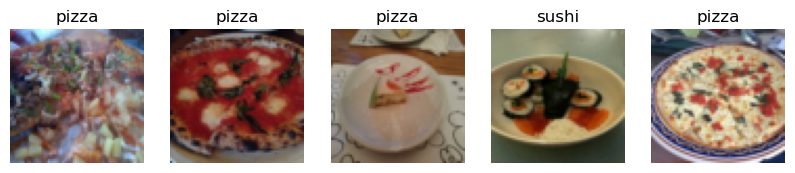

In [38]:
display_random_images(train_data, 5)

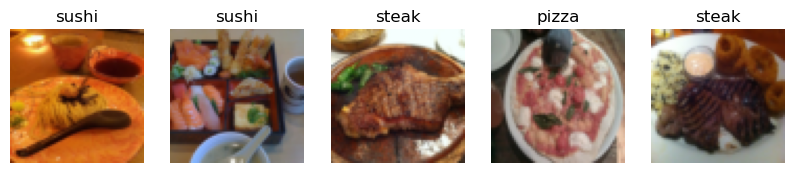

In [39]:
display_random_images(train_data_custom, 5)

In [40]:
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, 
                                     num_workers=0, 
                                     shuffle=True) 

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) 

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fa6307839a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa630782770>)

In [41]:
image_custom, label_custom = next(iter(train_dataloader_custom))
image_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [42]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

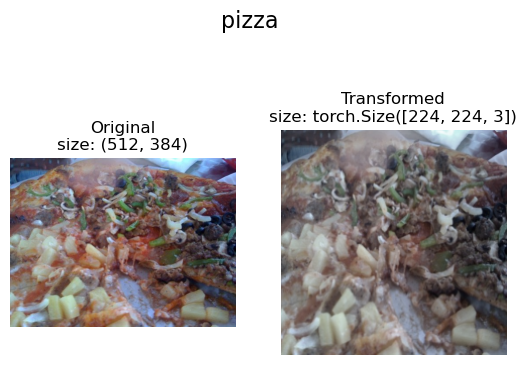

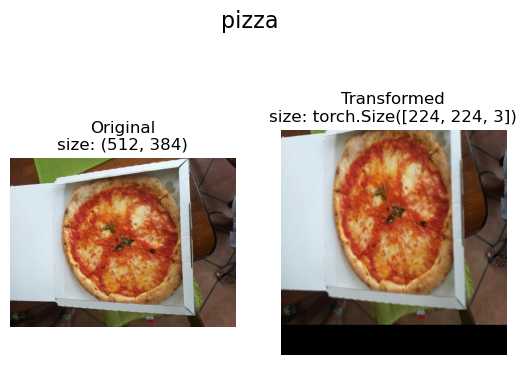

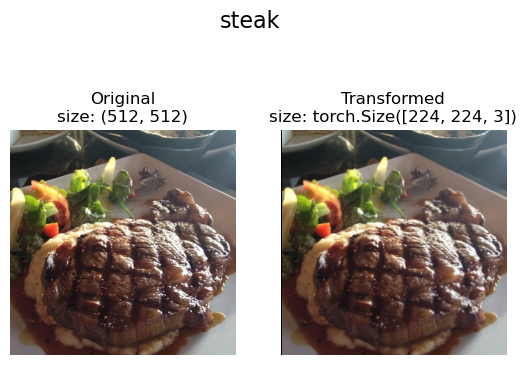

In [43]:
plot_transformed_images(image_path_list, train_transforms, 3, seed=None)

In [44]:
simple_transform = transforms.Compose([ 
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [45]:
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

train_dataloader_simple = DataLoader(train_data_simple, 32, shuffle=True, num_workers=os.cpu_count())
test_dataloader_simple = DataLoader(test_data_simple, 32, shuffle=False, num_workers=os.cpu_count())

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7fa6307a9030>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa62f528490>)

In [46]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label

(torch.Size([32, 3, 64, 64]), tensor([0]))

In [47]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.stacked_CNN = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units* 16* 16, out_features=output_shape)
        )
    def forward(self, x):
        return self.fc(self.stacked_CNN(x))

In [48]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data.classes))
model_0

TinyVGG(
  (stacked_CNN): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [49]:
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [50]:
single_image, single_label = image_batch[0].unsqueeze(dim=0), label_batch[0]
single_image.shape, single_label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([]))

In [51]:
model_0.eval()
with torch.inference_mode():
    y_pred = model_0(single_image)

In [52]:
y_pred.shape, y_pred

(torch.Size([1, 3]), tensor([[0.0565, 0.0614, 0.0375]]))

In [53]:
y_probs = torch.softmax(y_pred, dim=1)
y_probs, y_probs.shape

(tensor([[0.3349, 0.3365, 0.3286]]), torch.Size([1, 3]))

In [54]:
pred_label = torch.argmax(y_probs, dim=1).squeeze()
pred_label, pred_label.shape

(tensor(1), torch.Size([]))

In [55]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequential: 1-2                        [1, 3]                    --
│    └─Flat

In [56]:
def train_step(model: nn.Module, dataloader: DataLoader,
               loss_function: nn.Module, optimizer: torch.optim.Optimizer, device: torch.device):
    model.train()
    train_loss, train_acc = 0, 0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_function(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred_class = torch.argmax(y_pred, dim=1).squeeze()
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [57]:
def test_step(model: nn.Module, dataloader: DataLoader, loss_function: nn.Module, device: torch.device):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            test_loss += loss_function(y_pred, y)
            class_pred = y_pred.argmax(dim=1).squeeze()
            test_acc += (class_pred == y).sum().item() / len(class_pred)
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    return test_loss, test_acc    

In [58]:
from tqdm.auto import tqdm

def train(model: nn.Module, train_dataloader: DataLoader, test_dataloader: DataLoader,
          loss_function: nn.Module, optimizer: torch.optim.Optimizer, epochs: int, device: torch.device):
    results = {'train_loss': [],
               'train_acc': [],
               'test_loss': [],
               'test_acc': []
              }
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model, train_dataloader, loss_function, optimizer, device)
        test_loss, test_acc = test_step(model, test_dataloader, loss_function, device)
        print(f'Epoch: {epoch+1}\ntrain_loss: {train_loss:.4f} | train_acc: {train_acc:.4f}')
        print(f'test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}')
        results["train_loss"].append(train_loss.detach().cpu().numpy())
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss.detach().cpu().numpy())
        results["test_acc"].append(test_acc)
    return results
        

In [59]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [60]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)
model_0 = model_0.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model=model_0, train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple, loss_function= loss_fn,
                        optimizer=optimizer, epochs=10, device=device)
end_time = timer()
print(f'total time: {end_time - start_time:.3f}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
train_loss: 1.1071 | train_acc: 0.2500
test_loss: 1.1061 | test_acc: 0.2604
Epoch: 2
train_loss: 1.0784 | train_acc: 0.4258
test_loss: 1.1395 | test_acc: 0.2604
Epoch: 3
train_loss: 1.0804 | train_acc: 0.4258
test_loss: 1.1698 | test_acc: 0.2604
Epoch: 4
train_loss: 1.1283 | train_acc: 0.3047
test_loss: 1.1592 | test_acc: 0.2604
Epoch: 5
train_loss: 1.0889 | train_acc: 0.4258
test_loss: 1.1437 | test_acc: 0.2604
Epoch: 6
train_loss: 1.0963 | train_acc: 0.3047
test_loss: 1.1458 | test_acc: 0.2604
Epoch: 7
train_loss: 1.0903 | train_acc: 0.4766
test_loss: 1.1479 | test_acc: 0.1979
Epoch: 8
train_loss: 1.1035 | train_acc: 0.2930
test_loss: 1.1468 | test_acc: 0.1979
Epoch: 9
train_loss: 1.1101 | train_acc: 0.3086
test_loss: 1.1343 | test_acc: 0.3021
Epoch: 10
train_loss: 1.0986 | train_acc: 0.4297
test_loss: 1.0691 | test_acc: 0.4839
total time: 7.244


In [61]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [62]:
def plot_loss_curves(results: Dict[str, List[float]]):
    train_loss = results['train_loss']
    #train_loss = [loss.detach().cpu().numpy() for loss in train_loss]
    test_loss = results['test_loss']
    #test_loss = [loss.detach().cpu().numpy() for loss in test_loss]
    train_acc = results['train_acc']
    test_acc = results['test_acc']
    epochs = range(len(train_loss))
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='train loss')
    plt.plot(epochs, test_loss, label='test loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='train_accuracy')
    plt.plot(epochs, test_acc, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

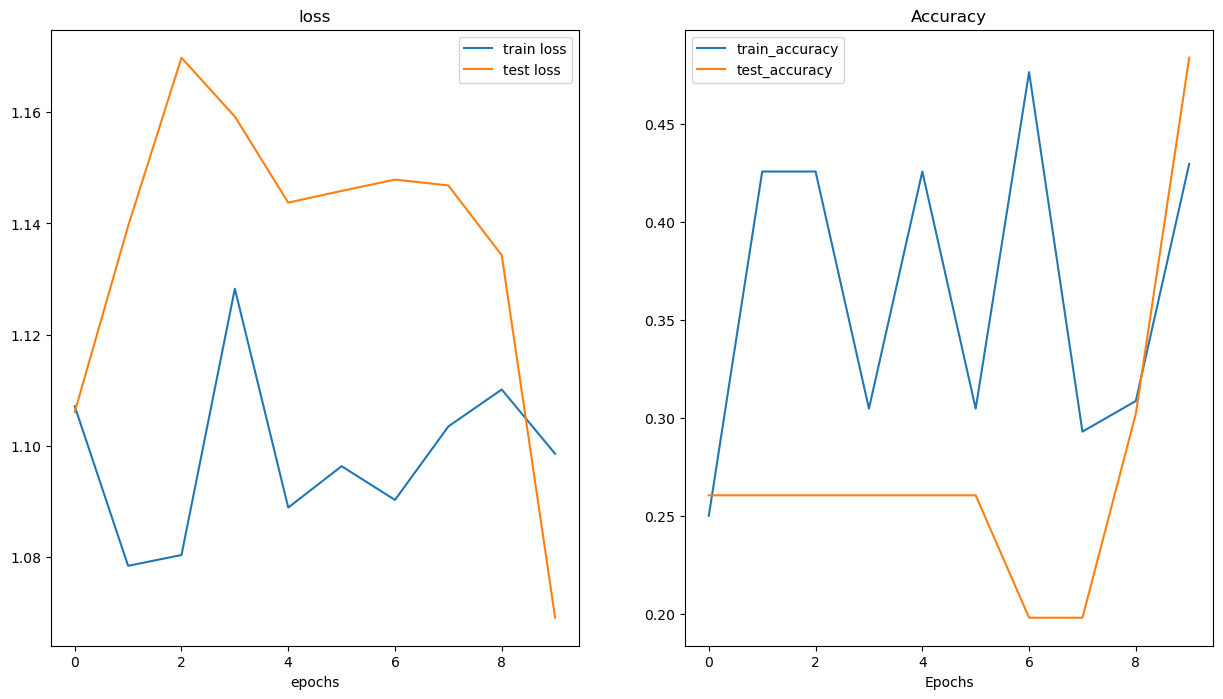

In [63]:
plot_loss_curves(model_0_results)

In [64]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [65]:
train_data_augmented = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial_augment)
# test_data_simple is already declared

In [66]:
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 32, shuffle=True, num_workers=os.cpu_count())
# test_dataloader_simple is already declared

In [67]:
torch.manual_seed(42)
model_1 = TinyVGG(3, 10, 3).to(device)
model_1

TinyVGG(
  (stacked_CNN): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
train_loss: 1.1074 | train_acc: 0.2500
test_loss: 1.1059 | test_acc: 0.2604
Epoch: 2
train_loss: 1.0790 | train_acc: 0.4258
test_loss: 1.1385 | test_acc: 0.2604
Epoch: 3
train_loss: 1.0802 | train_acc: 0.4258
test_loss: 1.1696 | test_acc: 0.2604
Epoch: 4
train_loss: 1.1286 | train_acc: 0.3047
test_loss: 1.1619 | test_acc: 0.2604
Epoch: 5
train_loss: 1.0885 | train_acc: 0.4258
test_loss: 1.1476 | test_acc: 0.2604
Epoch: 6
train_loss: 1.0969 | train_acc: 0.3047
test_loss: 1.1481 | test_acc: 0.2604
Epoch: 7
train_loss: 1.0921 | train_acc: 0.4492
test_loss: 1.1507 | test_acc: 0.1979
Epoch: 8
train_loss: 1.1007 | train_acc: 0.2930
test_loss: 1.1571 | test_acc: 0.1979
Epoch: 9
train_loss: 1.1207 | train_acc: 0.2930
test_loss: 1.1463 | test_acc: 0.3021
Epoch: 10
train_loss: 1.0948 | train_acc: 0.3867
test_loss: 1.1043 | test_acc: 0.2396
total time: 7.425553675999254


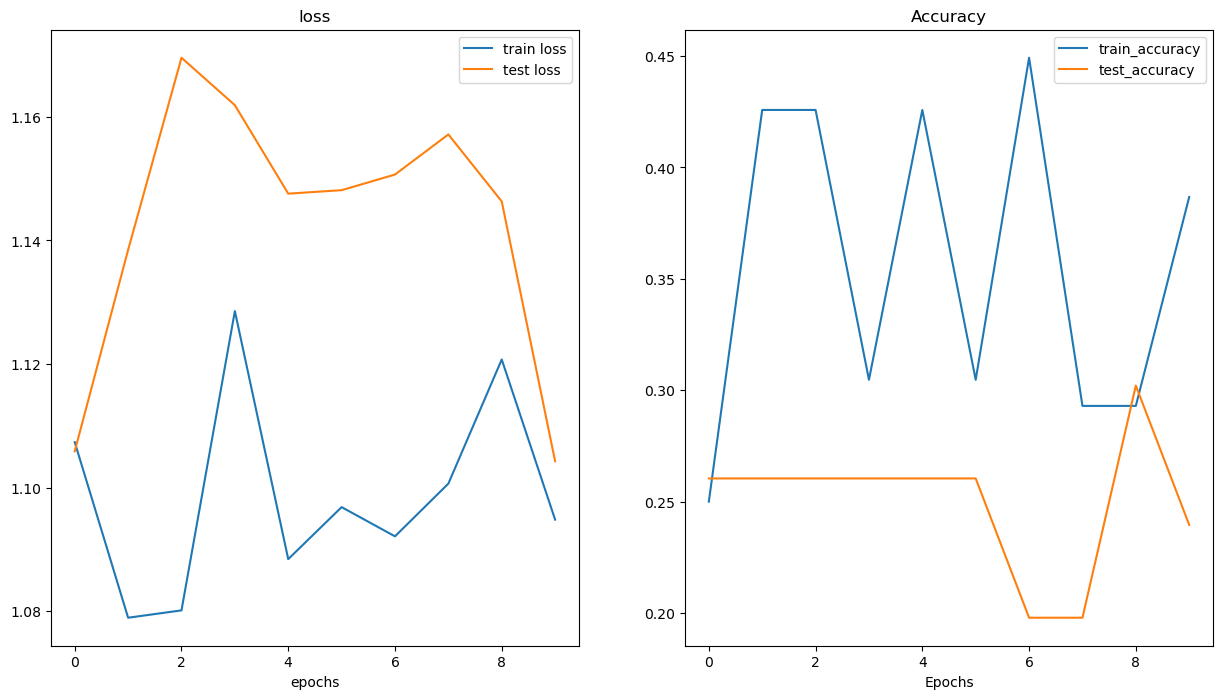

In [68]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

start_time = timer()
model_1_results = train(model_1, train_dataloader_augmented, test_dataloader_simple,
                        loss_fn, optimizer, 10, device)
end_time = timer()
print(f'total time: {end_time - start_time}')
plot_loss_curves(model_1_results)

In [69]:
import pandas as pd
# model_0_results_cpu = {key: tensor.cpu().numpy() for key, tensor in model_0_results.items()}
# model_1_results_cpu = {key: tensor.cpu().numpy() for key, tensor in model_1_results.items()}
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.1071205,0.250000,1.1060708,0.260417
1,1.0784245,0.425781,1.1395124,0.260417
2,1.0803698,0.425781,1.1697977,0.260417
3,1.1282581,0.304688,1.1592073,0.260417
4,1.0888982,0.425781,1.1437454,0.260417
5,1.0963445,0.304688,1.1458424,0.260417
6,1.090276,0.476562,1.147879,0.197917
7,1.1034889,0.292969,1.1468309,0.197917
8,1.110133,0.308594,1.1342702,0.302083
9,1.0985783,0.429688,1.0690923,0.483902


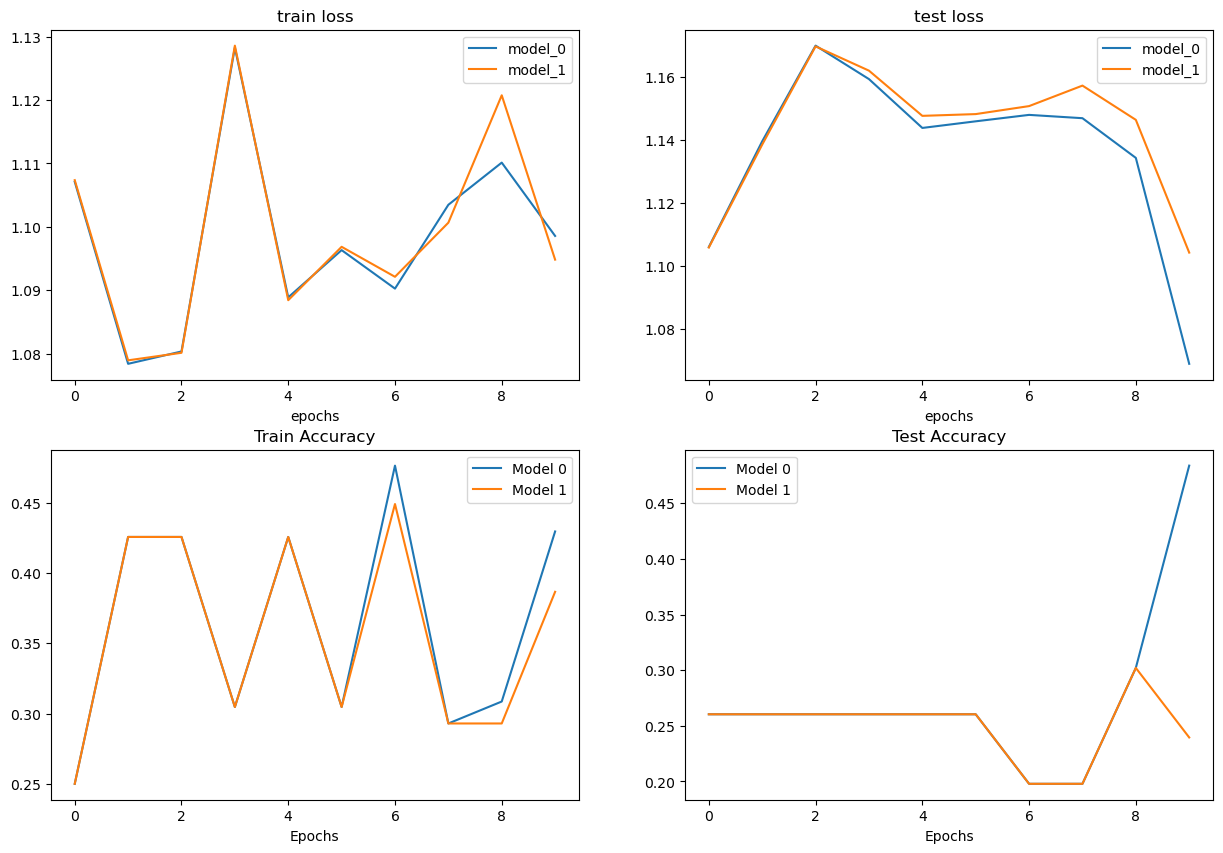

In [70]:
epochs_model_0 = range(len(model_0_df))
epochs_model_1 = range(len(model_1_df))
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_model_0, model_0_df['train_loss'], label='model_0')
plt.plot(epochs_model_1, model_1_df['train_loss'], label='model_1')
plt.title("train loss")
plt.xlabel('epochs')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs_model_0, model_0_df['test_loss'], label='model_0')
plt.plot(epochs_model_1, model_1_df['test_loss'], label='model_1')
plt.title("test loss")
plt.xlabel('epochs')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs_model_0, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs_model_1, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs_model_0, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs_model_1, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [72]:
custom_image_path = data_path / '04-pizza-dad.jpeg'
if not custom_image_path.is_file():
    with open(custom_image_path, 'wb') as f:
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        f.write(request.content)

In [76]:
import torchvision
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255
custom_image.shape, custom_image.dtype

(torch.Size([3, 4032, 3024]), torch.float32)

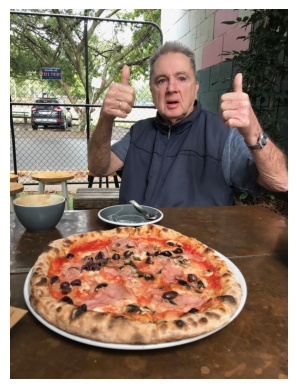

In [80]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.axis(False);

In [81]:
custom_transform = transforms.Compose([
    transforms.Resize((64, 64))
])
custom_image_transformed = custom_transform(custom_image)
custom_image_transformed.shape

/home/ameermmdd/anaconda3/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 64, 64])

In [84]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

In [85]:
custom_image_pred.shape, custom_image_pred

(torch.Size([1, 3]), tensor([[-0.0485,  0.0290, -0.0263]], device='cuda:0'))

In [88]:
custom_class_pred = torch.argmax(torch.softmax(custom_image_pred, dim=1), dim=1).squeeze()
custom_class_pred = class_names[custom_class_pred]
custom_class_pred

'steak'